1. Importowanie paczek

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2. Wczytanie danych przetworzonych

In [62]:
processed_file_path = "../data/processed/Chicago_Crimes_2012_to_2017_processed.csv"
processed_df = pd.read_csv(processed_file_path)

# Konwersja kolumny 'Date' na typ datetime (jeśli jeszcze tego nie zrobiono)
processed_df['Date'] = pd.to_datetime(processed_df['Date'])


3. Rozkład typów przestępstw

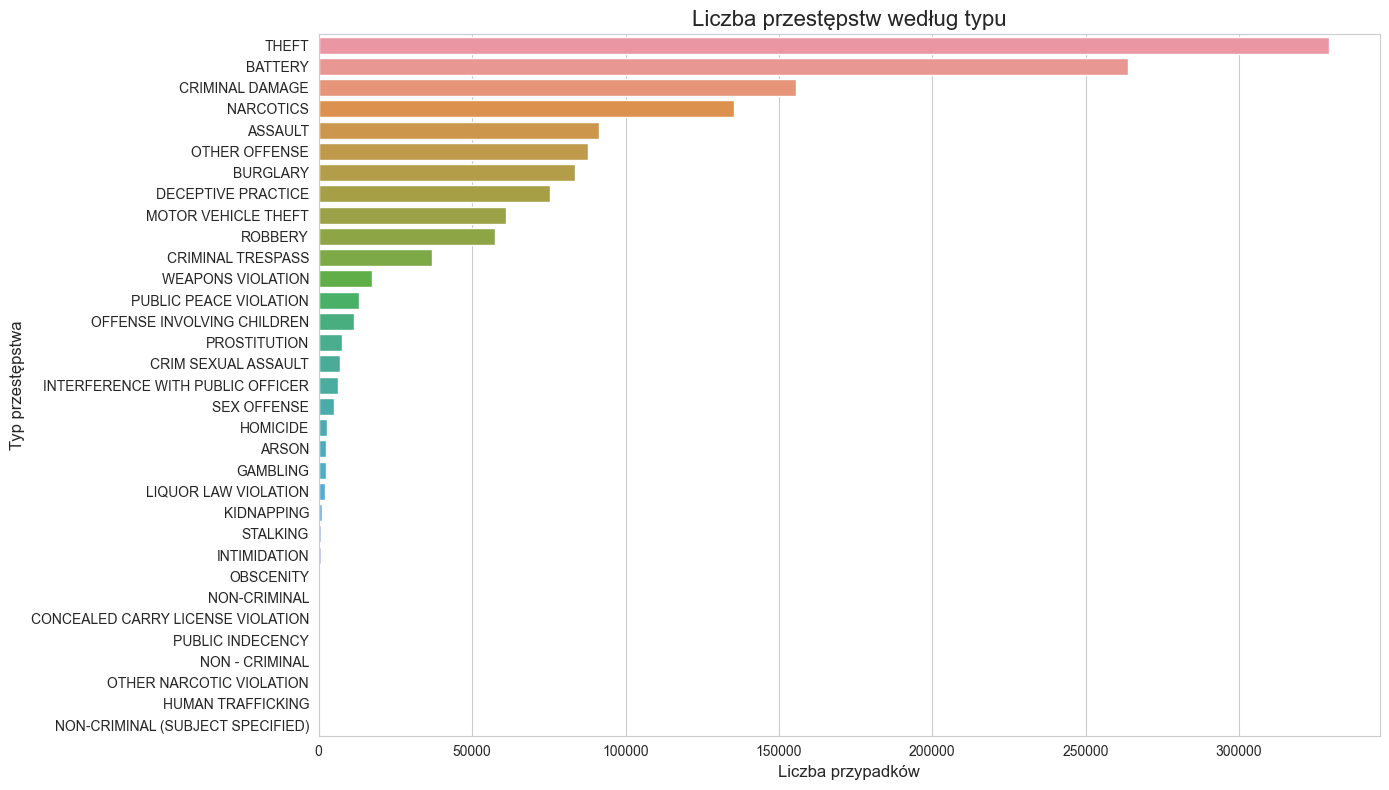

In [63]:
# Analiza danych: rozkład typów przestępstw
crime_counts = processed_df['Primary Type'].value_counts()
sorted_crime_counts = crime_counts.sort_values(ascending=False)

# Ścieżka do zapisu wykresu

# Wykres: Liczba przestępstw według typu
plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_crime_counts.values, y=sorted_crime_counts.index)
plt.title("Liczba przestępstw według typu", fontsize=16)
plt.xlabel("Liczba przypadków", fontsize=12)
plt.ylabel("Typ przestępstwa", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

4. Rozkład przestępstw według godziny

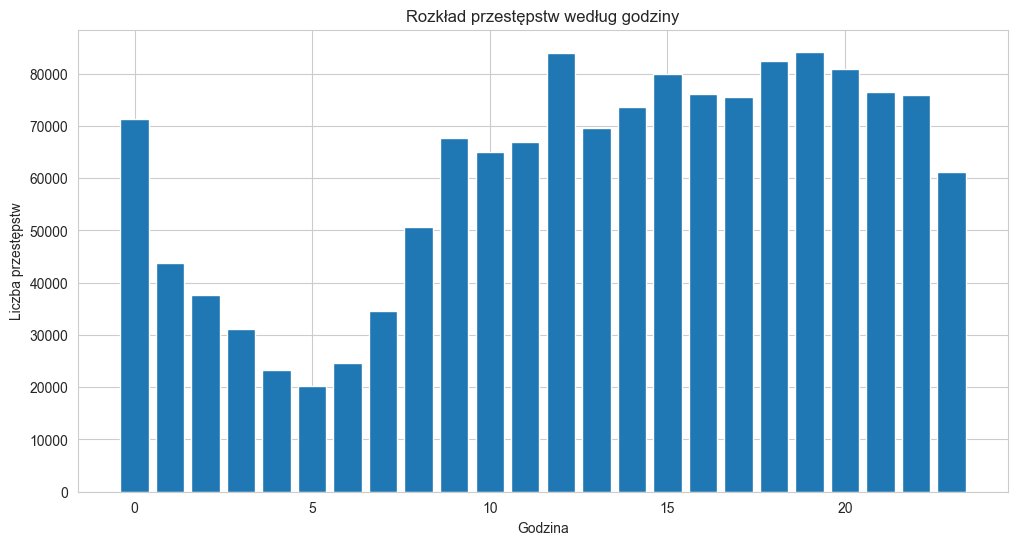

In [64]:
def plot_hourly_distribution():
    plt.figure(figsize=(12, 6))
    hour_counts = processed_df['Hour'].value_counts().sort_index()

    plt.bar(hour_counts.index, hour_counts.values)
    plt.title('Rozkład przestępstw według godziny')
    plt.xlabel('Godzina')
    plt.ylabel('Liczba przestępstw')
    plt.show()

# Użycie:
plot_hourly_distribution()

5. Rozkład przestępstw według lokalizacji

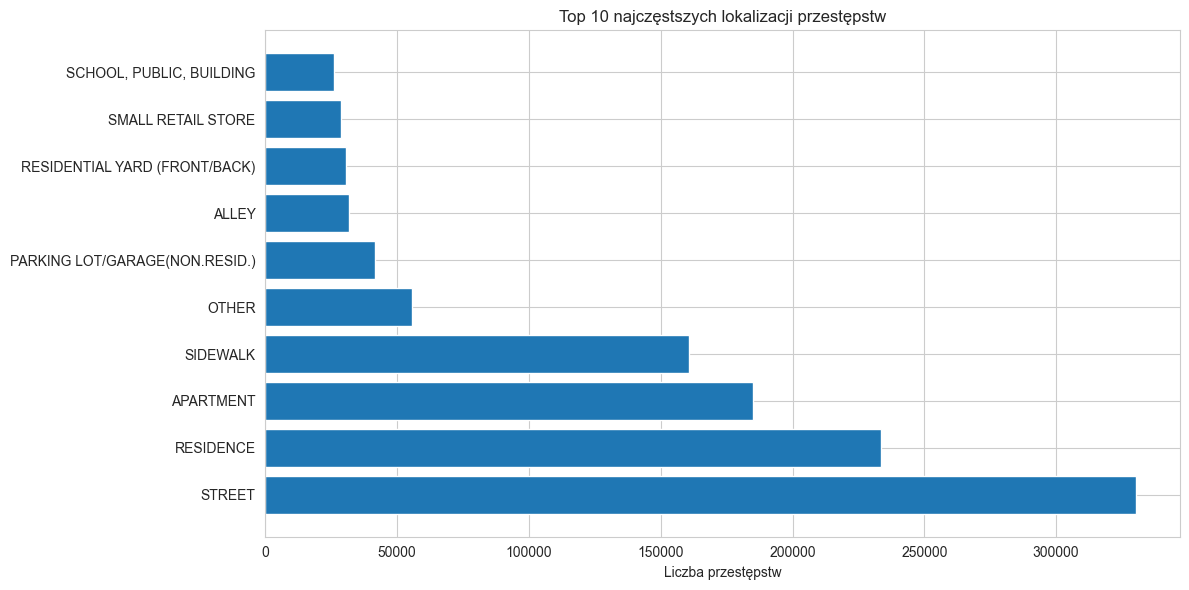

In [65]:
def plot_top_locations():
    plt.figure(figsize=(12, 6))
    location_counts = processed_df['Location Description'].value_counts().head(10)

    plt.barh(range(len(location_counts)), location_counts.values)
    plt.yticks(range(len(location_counts)), location_counts.index)
    plt.title('Top 10 najczęstszych lokalizacji przestępstw')
    plt.xlabel('Liczba przestępstw')
    plt.tight_layout()
    plt.show()

# Użycie:
plot_top_locations()

6. Procent przestępstw zakończonych aresztowaniem

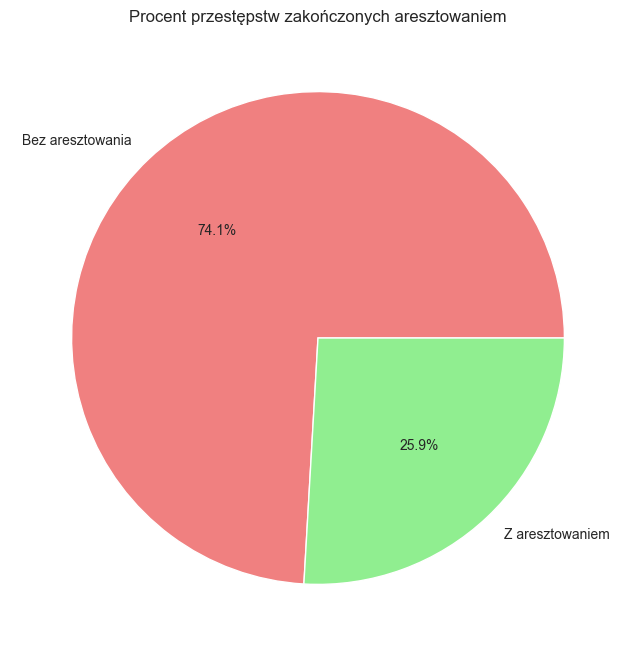

In [66]:
def plot_arrests():
    plt.figure(figsize=(8, 8))
    arrest_counts = processed_df['Arrest'].value_counts()

    plt.pie(arrest_counts.values,
           labels=['Bez aresztowania', 'Z aresztowaniem'],
           autopct='%1.1f%%',
           colors=['lightcoral', 'lightgreen'])
    plt.title('Procent przestępstw zakończonych aresztowaniem')
    plt.show()

# Użycie:
plot_arrests()

7. Ilość przestępstw w poszczególne miesiące

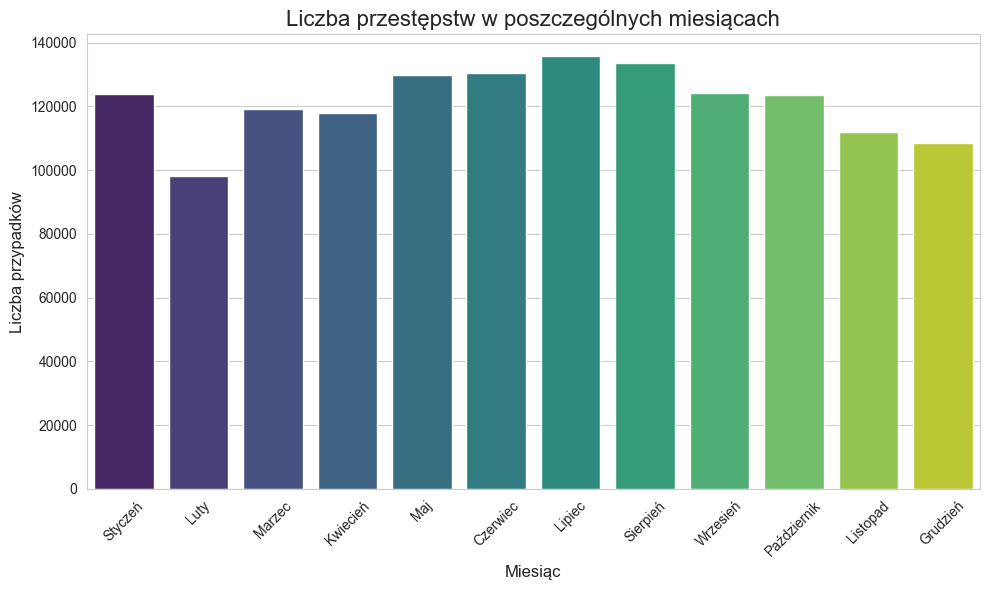

In [67]:
# Upewnienie się, że kolumna 'Month' istnieje jako liczba całkowita
processed_df['Month'] = processed_df['Month'].astype(int)

# Analiza danych: liczba przestępstw w poszczególnych miesiącach
month_counts = processed_df['Month'].value_counts().sort_index()

# Wykres: liczba przestępstw w miesiącach
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")
plt.title("Liczba przestępstw w poszczególnych miesiącach", fontsize=16)
plt.xlabel("Miesiąc", fontsize=12)
plt.ylabel("Liczba przypadków", fontsize=12)
plt.xticks(ticks=range(12), labels=['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'], rotation=45)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

8. Liczba przestępstw w czasie dla najczęstszych kategorii

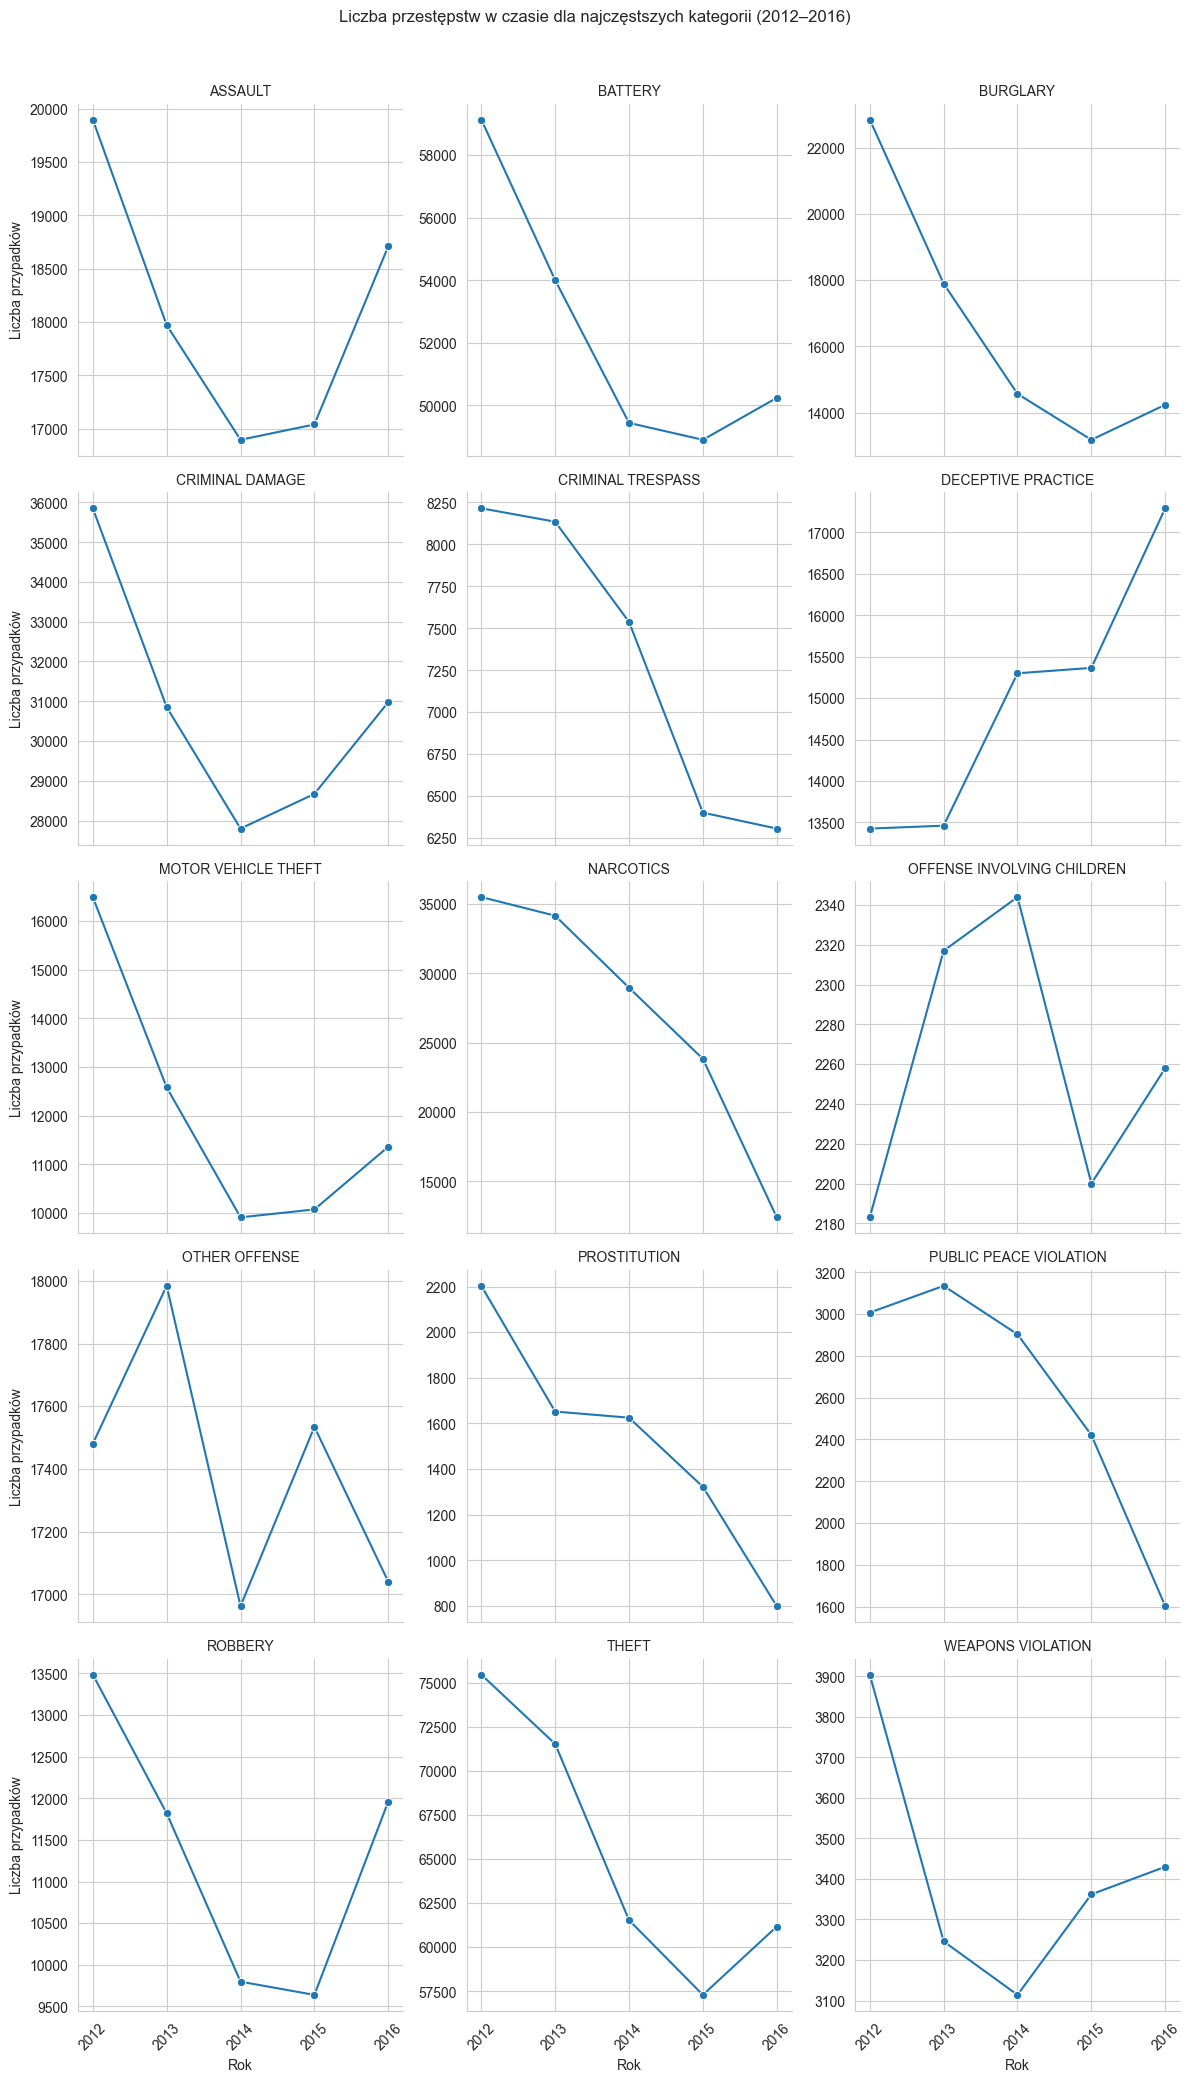

In [68]:
# Grupowanie danych: liczba przestępstw według roku i kategorii 'Primary Type'
yearly_crime_counts = processed_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Filtrowanie danych tylko dla lat 2012–2016
yearly_crime_counts = yearly_crime_counts[(yearly_crime_counts['Year'] >= 2012) & (yearly_crime_counts['Year'] <= 2016)]

# Znalezienie najczęstszych typów przestępstw (np. top 15)
top_crime_types = processed_df['Primary Type'].value_counts().head(15).index

# Filtracja danych dla najczęstszych typów przestępstw
filtered_data = yearly_crime_counts[yearly_crime_counts['Primary Type'].isin(top_crime_types)]

# Ustawienia wykresu
sns.set_style("whitegrid")
g = sns.FacetGrid(filtered_data, col="Primary Type", col_wrap=3, height=4, sharey=False, sharex=True)
g.map(sns.lineplot, "Year", "Count", marker="o")

# Dodanie tytułów i ustawienie etykiet osi X
g.set_titles("{col_name}")
g.set_axis_labels("Rok", "Liczba przypadków")

# Wymuszenie etykiet osi X (lat) dla każdego wykresu
for ax in g.axes.flat:
    ax.set_xticks(range(2012, 2017))  # Zakres lat od 2012 do 2016
    ax.set_xticklabels(range(2012, 2017), rotation=45)  # Rotacja etykiet osi X

# Dodanie tytułu głównego
g.fig.suptitle("Liczba przestępstw w czasie dla najczęstszych kategorii (2012–2016)", y=1.03)

# Wyświetlenie wykresu
plt.show()

Podstawowe statystyki

In [69]:
def get_basic_stats(df):
    stats = {
        'Całkowita liczba przestępstw': len(df),
        'Unikalne typy przestępstw': df['Primary Type'].nunique(),
        'Wskaźnik aresztowań (%)': (df['Arrest'].mean() * 100).round(2),
        'Najczęstszy typ przestępstwa': df['Primary Type'].mode()[0],
        'Najczęstsza lokalizacja': df['Location Description'].mode()[0],
        'Średnia dzienna liczba przestępstw': df.groupby(df['Date'].dt.date).size().mean().round(2)
    }
    return pd.Series(stats)

print("\nPodstawowe statystyki:")
print(get_basic_stats(processed_df))


Podstawowe statystyki:
Całkowita liczba przestępstw          1456714
Unikalne typy przestępstw                  33
Wskaźnik aresztowań (%)                 25.91
Najczęstszy typ przestępstwa            THEFT
Najczęstsza lokalizacja                STREET
Średnia dzienna liczba przestępstw     789.55
dtype: object


Wnioski

In [71]:
def generate_summary(df):
    # Najczęstsze typy przestępstw
    top_crimes = df['Primary Type'].value_counts().head(3).index.tolist()

    # Wskaźnik aresztowań
    arrest_rate = (df['Arrest'].mean() * 100).round(2)

    # Godziny z najwyższą liczbą przestępstw
    top_hours = df['Hour'].value_counts().head(3).index.tolist()

    # Dni tygodnia z najwyższą liczbą przestępstw
    df['Day of Week'] = df['Date'].dt.day_name()  # Dodanie kolumny dnia tygodnia
    top_days = df['Day of Week'].value_counts().head(3).index.tolist()

    # Lokalizacje z najwyższą liczbą przestępstw
    top_locations = df['Location Description'].value_counts().head(3).index.tolist()

    # Typy przestępstw z najwyższym i najniższym wskaźnikiem aresztowań
    arrest_by_type = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
    highest_arrest_types = arrest_by_type.head(3).index.tolist()
    lowest_arrest_types = arrest_by_type.tail(3).index.tolist()

    # Generowanie podsumowania
    summary = f"""
    Na podstawie przeprowadzonej analizy można wyciągnąć następujące wnioski:

    1. Rozkład przestępstw:
       - Najczęstsze typy przestępstw to: {', '.join(top_crimes)}
       - {arrest_rate}% wszystkich przestępstw kończy się aresztowaniem

    2. Wzorce czasowe:
       - Szczyt przestępczości przypada na godziny: {', '.join(map(str, top_hours))}
       - Dni tygodnia z najwyższą przestępczością to: {', '.join(top_days)}

    3. Lokalizacja:
       - Najwięcej przestępstw ma miejsce w: {', '.join(top_locations)}
       - Widoczna jest koncentracja przestępstw w określonych obszarach miasta

    4. Skuteczność aresztowań:
       - Najwyższy wskaźnik aresztowań występuje w przypadku: {', '.join(highest_arrest_types)}
       - Najniższy wskaźnik aresztowań dotyczy: {', '.join(lowest_arrest_types)}
    """

    return summary

# Przykładowe wywołanie funkcji
print(generate_summary(processed_df))


    Na podstawie przeprowadzonej analizy można wyciągnąć następujące wnioski:

    1. Rozkład przestępstw:
       - Najczęstsze typy przestępstw to: THEFT, BATTERY, CRIMINAL DAMAGE
       - 25.91% wszystkich przestępstw kończy się aresztowaniem

    2. Wzorce czasowe:
       - Szczyt przestępczości przypada na godziny: 19, 12, 18
       - Dni tygodnia z najwyższą przestępczością to: Friday, Saturday, Wednesday

    3. Lokalizacja:
       - Najwięcej przestępstw ma miejsce w: STREET, RESIDENCE, APARTMENT
       - Widoczna jest koncentracja przestępstw w określonych obszarach miasta

    4. Skuteczność aresztowań:
       - Najwyższy wskaźnik aresztowań występuje w przypadku: PUBLIC INDECENCY, GAMBLING, PROSTITUTION
       - Najniższy wskaźnik aresztowań dotyczy: MOTOR VEHICLE THEFT, CRIMINAL DAMAGE, BURGLARY
    
